<a href="https://colab.research.google.com/github/lakshya324/MLCOE-Task-2/blob/main/task2_2_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLCOE Task 2.2 - Classification
$\textrm{Lakshya Sharma} $

## Step 1 - Data Preprocessing

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Importing Dataset

In [2]:
df=pd.read_csv('Raw_Data_Singapore Credit Dataset.csv')
df

checking_balance  months_loan_duration credit_history  \
0            < 0 SGD                     6       critical   
1        1 - 200 SGD                    48           good   
2            unknown                    12       critical   
3            < 0 SGD                    42           good   
4            < 0 SGD                    24           poor   
..               ...                   ...            ...   
995          unknown                    12           good   
996          < 0 SGD                    30           good   
997          unknown                    12           good   
998          < 0 SGD                    45           good   
999      1 - 200 SGD                    45       critical   

                  purpose  amount savings_balance employment_duration  \
0    furniture/appliances    1169         unknown           > 7 years   
1    furniture/appliances    5951       < 100 SGD         1 - 4 years   
2               education    2096       < 100 SGD         4 - 7 years   
3    furniture/appliances    7882       < 100 SGD         4 - 7 years   
4                     car    4870       < 100 SGD         1 - 4 years   
..                    ...     ...             ...                 ...   
995  furniture/appliances    1736       < 100 SGD         4 - 7 years   
996                   car    3857       < 100 SGD         1 - 4 years   
997  furniture/appliances     804       < 100 SGD           > 7 years   
998  furniture/appliances    1845       < 100 SGD         1 - 4 years   
999                   car    4576   100 - 500 SGD          unemployed   

     percent_of_income  years_at_residence  age other_credit housing  \
0                    4                   4   67         none     own   
1                    2                   2   22         none     own   
2                    2                   3   49         none     own   
3                    2                   4   45         none   other   
4                    3                   4   53         none   other   
..                 ...                 ...  ...          ...     ...   
995                  3                   4   31         none     own   
996                  4                   4   40         none     own   
997                  4                   4   38         none     own   
998                  4                   4   23         none   other   
999                  3                   4   27         none     own   

     existing_loans_count         job  dependents phone default  
0                       2     skilled           1   yes      no  
1                       1     skilled           1    no     yes  
2                       1   unskilled           2    no      no  
3                       1     skilled           2    no      no  
4                       2     skilled           2    no     yes  
..                    ...         ...         ...   ...     ...  
995                     1   unskilled           1    no      no  
996                     1  management           1   yes      no  
997                     1     skilled           1    no      no  
998                     1     skilled           1   yes     yes  
999                     1     skilled           1    no      no  

[1000 rows x 17 columns]

In [3]:
df.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [5]:
print("[INFO]:\n\n")
for i in df.columns:
  print(f"column {i} : {df[i].unique()}\n\n")

[INFO]:


column checking_balance : ['< 0 SGD' '1 - 200 SGD' 'unknown' '> 200 SGD']


column months_loan_duration : [ 6 48 12 42 24 36 30 15  9 10  7 60 18 45 11 27  8 54 20 14 33 21 16  4
 47 13 22 39 28  5 26 72 40]


column credit_history : ['critical' 'good' 'poor' 'perfect' 'very good']


column purpose : ['furniture/appliances' 'education' 'car' 'business' 'renovations' 'car0']


column amount : [ 1169  5951  2096  7882  4870  9055  2835  6948  3059  5234  1295  4308
  1567  1199  1403  1282  2424  8072 12579  3430  2134  2647  2241  1804
  2069  1374   426   409  2415  6836  1913  4020  5866  1264  1474  4746
  6110  2100  1225   458  2333  1158  6204  6187  6143  1393  2299  1352
  7228  2073  5965  1262  3378  2225   783  6468  9566  1961  6229  1391
  1537  1953 14421  3181  5190  2171  1007  1819  2394  8133   730  1164
  5954  1977  1526  3965  4771  9436  3832  5943  1213  1568  1755  2315
  1412 12612  2249  1108   618  1409   797  3617  1318 15945  2012  2622
  2337  705

### Data Cleaning

checking_balance column

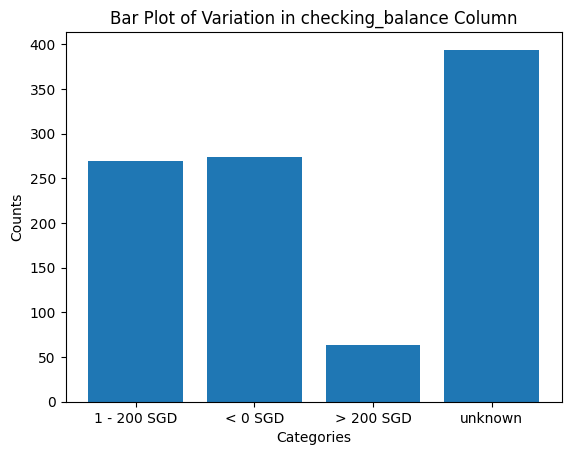

In [6]:
variation={i: j for i,j in zip(*np.unique(df['checking_balance'],return_counts=True))}
plt.bar(variation.keys(), variation.values())
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Bar Plot of Variation in checking_balance Column')
plt.show()

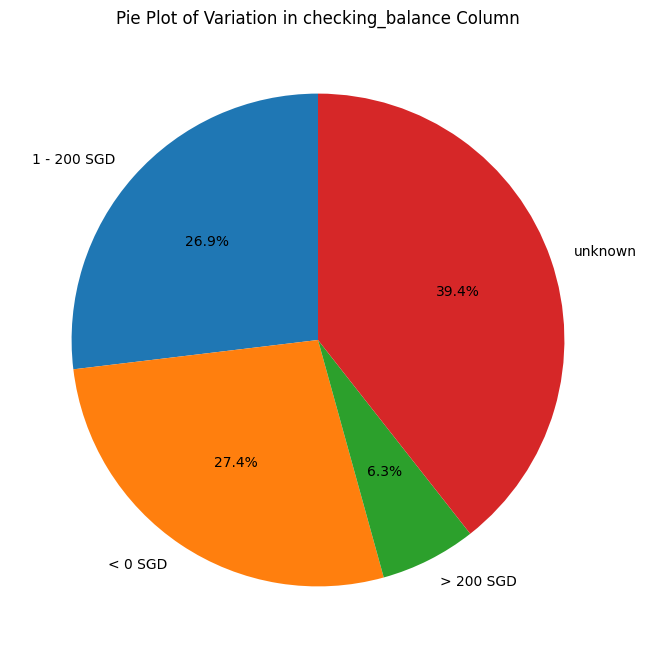

In [7]:
plt.figure(figsize=(10, 8))
plt.pie(variation.values(), labels=variation.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Pie Plot of Variation in checking_balance Column')
plt.show()

In [8]:
df['checking_balance'].replace({'< 0 SGD': 0,'1 - 200 SGD': 2,'unknown': -1,'> 200 SGD':3},inplace=True)

In [9]:
df.head()

checking_balance  months_loan_duration credit_history  \
0                 0                     6       critical   
1                 2                    48           good   
2                -1                    12       critical   
3                 0                    42           good   
4                 0                    24           poor   

                purpose  amount savings_balance employment_duration  \
0  furniture/appliances    1169         unknown           > 7 years   
1  furniture/appliances    5951       < 100 SGD         1 - 4 years   
2             education    2096       < 100 SGD         4 - 7 years   
3  furniture/appliances    7882       < 100 SGD         4 - 7 years   
4                   car    4870       < 100 SGD         1 - 4 years   

   percent_of_income  years_at_residence  age other_credit housing  \
0                  4                   4   67         none     own   
1                  2                   2   22         none     own   
2                  2                   3   49         none     own   
3                  2                   4   45         none   other   
4                  3                   4   53         none   other   

   existing_loans_count        job  dependents phone default  
0                     2    skilled           1   yes      no  
1                     1    skilled           1    no     yes  
2                     1  unskilled           2    no      no  
3                     1    skilled           2    no      no  
4                     2    skilled           2    no     yes

credit_history column

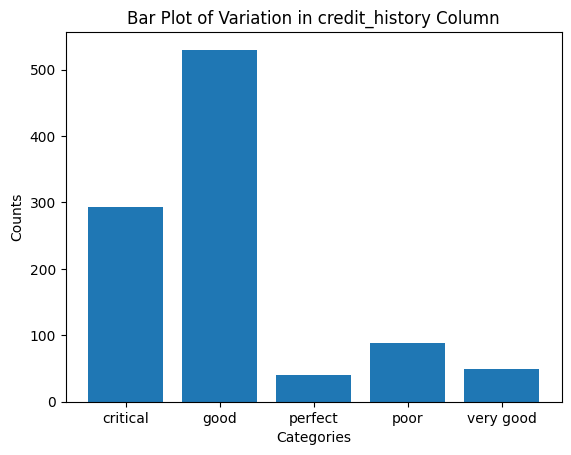

In [10]:
variation={i: j for i,j in zip(*np.unique(df['credit_history'],return_counts=True))}
plt.bar(variation.keys(), variation.values())
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Bar Plot of Variation in credit_history Column')
plt.show()

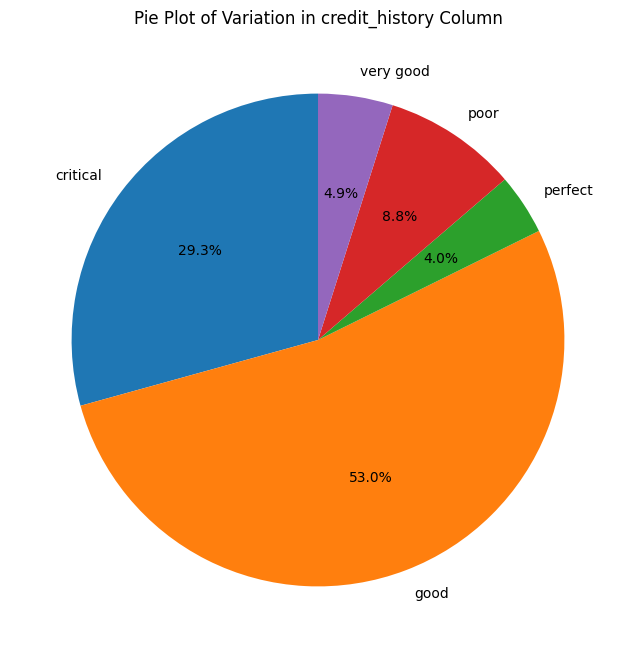

In [11]:
plt.figure(figsize=(10, 8))
plt.pie(variation.values(), labels=variation.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Pie Plot of Variation in credit_history Column')
plt.show()

In [12]:
df['credit_history'].replace({'critical':0,'good':2,'poor':1,'perfect':4,'very good':3},inplace=True)

In [13]:
df.head()

checking_balance  months_loan_duration  credit_history  \
0                 0                     6               0   
1                 2                    48               2   
2                -1                    12               0   
3                 0                    42               2   
4                 0                    24               1   

                purpose  amount savings_balance employment_duration  \
0  furniture/appliances    1169         unknown           > 7 years   
1  furniture/appliances    5951       < 100 SGD         1 - 4 years   
2             education    2096       < 100 SGD         4 - 7 years   
3  furniture/appliances    7882       < 100 SGD         4 - 7 years   
4                   car    4870       < 100 SGD         1 - 4 years   

   percent_of_income  years_at_residence  age other_credit housing  \
0                  4                   4   67         none     own   
1                  2                   2   22         none     own   
2                  2                   3   49         none     own   
3                  2                   4   45         none   other   
4                  3                   4   53         none   other   

   existing_loans_count        job  dependents phone default  
0                     2    skilled           1   yes      no  
1                     1    skilled           1    no     yes  
2                     1  unskilled           2    no      no  
3                     1    skilled           2    no      no  
4                     2    skilled           2    no     yes

purpose column

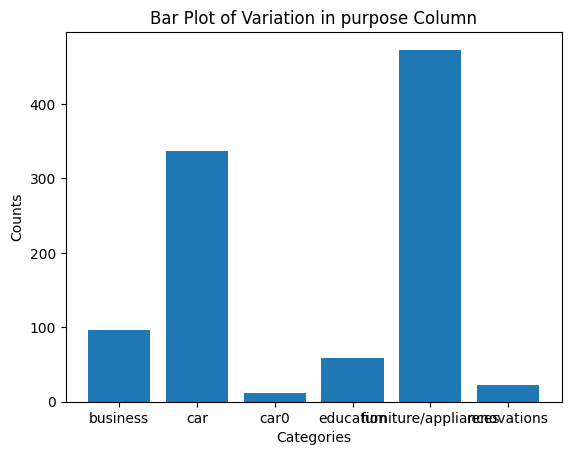

In [14]:
variation={i: j for i,j in zip(*np.unique(df['purpose'],return_counts=True))}
plt.bar(variation.keys(), variation.values())
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Bar Plot of Variation in purpose Column')
plt.show()

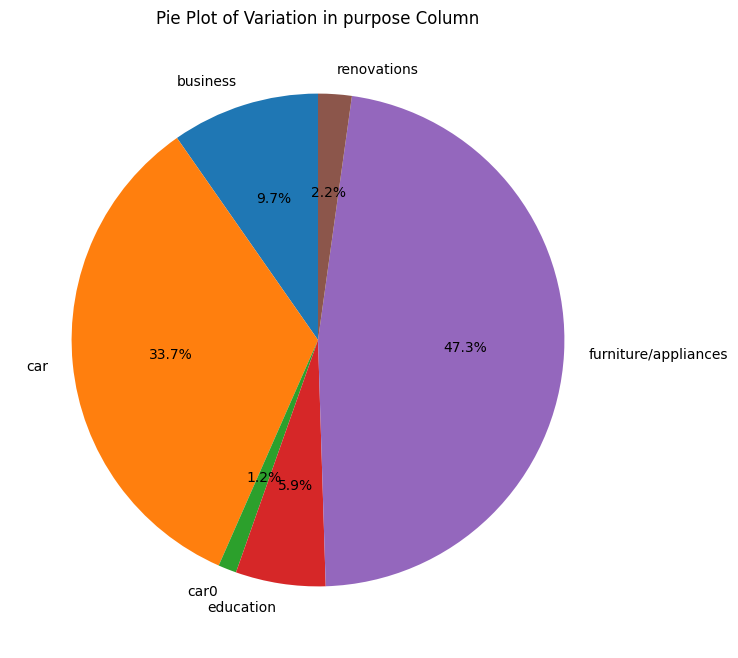

In [15]:
plt.figure(figsize=(10, 8))
plt.pie(variation.values(), labels=variation.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Pie Plot of Variation in purpose Column')
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()
df['purpose']=le.fit_transform(df['purpose'])

In [18]:
df.head()

checking_balance  months_loan_duration  credit_history  purpose  amount  \
0                 0                     6               0        4    1169   
1                 2                    48               2        4    5951   
2                -1                    12               0        3    2096   
3                 0                    42               2        4    7882   
4                 0                    24               1        1    4870   

  savings_balance employment_duration  percent_of_income  years_at_residence  \
0         unknown           > 7 years                  4                   4   
1       < 100 SGD         1 - 4 years                  2                   2   
2       < 100 SGD         4 - 7 years                  2                   3   
3       < 100 SGD         4 - 7 years                  2                   4   
4       < 100 SGD         1 - 4 years                  3                   4   

   age other_credit housing  existing_loans_count        job  dependents  \
0   67         none     own                     2    skilled           1   
1   22         none     own                     1    skilled           1   
2   49         none     own                     1  unskilled           2   
3   45         none   other                     1    skilled           2   
4   53         none   other                     2    skilled           2   

  phone default  
0   yes      no  
1    no     yes  
2    no      no  
3    no      no  
4    no     yes

In [19]:
for i in ['furniture/appliances','education','car','business','renovations','car0']:
  print(f"{le.transform([i])[0]} => {i}")

4 => furniture/appliances
3 => education
1 => car
0 => business
5 => renovations
2 => car0


savings_balance column

In [20]:
variation={i: j for i,j in zip(*np.unique(df['savings_balance'],return_counts=True))}
plt.bar(variation.keys(), variation.values())
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Bar Plot of Variation in savings_balance Column')
plt.show()

In [21]:
plt.figure(figsize=(10, 8))
plt.pie(variation.values(), labels=variation.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Pie Plot of Variation in savings_balance Column')
plt.show()

In [22]:
df['savings_balance'].replace({'unknown':0,'< 100 SGD':1,'500 - 1000 SGD':3,'> 1000 SGD':4,'100 - 500 SGD':2},inplace=True)
df.head()

checking_balance  months_loan_duration  credit_history  purpose  amount  \
0                 0                     6               0        4    1169   
1                 2                    48               2        4    5951   
2                -1                    12               0        3    2096   
3                 0                    42               2        4    7882   
4                 0                    24               1        1    4870   

   savings_balance employment_duration  percent_of_income  years_at_residence  \
0                0           > 7 years                  4                   4   
1                1         1 - 4 years                  2                   2   
2                1         4 - 7 years                  2                   3   
3                1         4 - 7 years                  2                   4   
4                1         1 - 4 years                  3                   4   

   age other_credit housing  existing_loans_count        job  dependents  \
0   67         none     own                     2    skilled           1   
1   22         none     own                     1    skilled           1   
2   49         none     own                     1  unskilled           2   
3   45         none   other                     1    skilled           2   
4   53         none   other                     2    skilled           2   

  phone default  
0   yes      no  
1    no     yes  
2    no      no  
3    no      no  
4    no     yes

employment_duration column

In [23]:
df['employment_duration'].replace({'> 7 years':4,'1 - 4 years':2,'4 - 7 years':3,'unemployed':0,'< 1 year':1},inplace=True)
df.head()

checking_balance  months_loan_duration  credit_history  purpose  amount  \
0                 0                     6               0        4    1169   
1                 2                    48               2        4    5951   
2                -1                    12               0        3    2096   
3                 0                    42               2        4    7882   
4                 0                    24               1        1    4870   

   savings_balance  employment_duration  percent_of_income  \
0                0                    4                  4   
1                1                    2                  2   
2                1                    3                  2   
3                1                    3                  2   
4                1                    2                  3   

   years_at_residence  age other_credit housing  existing_loans_count  \
0                   4   67         none     own                     2   
1                   2   22         none     own                     1   
2                   3   49         none     own                     1   
3                   4   45         none   other                     1   
4                   4   53         none   other                     2   

         job  dependents phone default  
0    skilled           1   yes      no  
1    skilled           1    no     yes  
2  unskilled           2    no      no  
3    skilled           2    no      no  
4    skilled           2    no     yes

other_credit column

In [24]:
variation={i: j for i,j in zip(*np.unique(df['other_credit'],return_counts=True))}
plt.bar(variation.keys(), variation.values())
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Bar Plot of Variation in Other Credit Column')
plt.show()

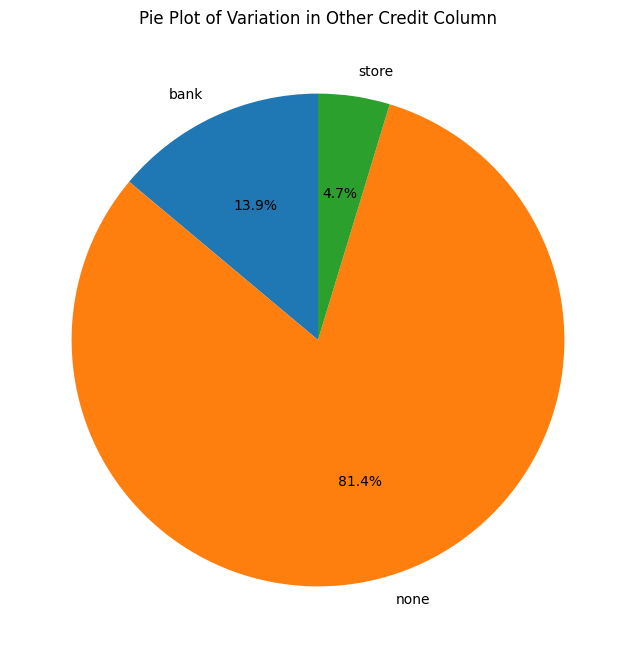

In [25]:
plt.figure(figsize=(10, 8))
plt.pie(variation.values(), labels=variation.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Pie Plot of Variation in Other Credit Column')
plt.show()

In [26]:
df['other_credit']=le.fit_transform(df['other_credit'])
df.head()

checking_balance  months_loan_duration  credit_history  purpose  amount  \
0                 0                     6               0        4    1169   
1                 2                    48               2        4    5951   
2                -1                    12               0        3    2096   
3                 0                    42               2        4    7882   
4                 0                    24               1        1    4870   

   savings_balance  employment_duration  percent_of_income  \
0                0                    4                  4   
1                1                    2                  2   
2                1                    3                  2   
3                1                    3                  2   
4                1                    2                  3   

   years_at_residence  age  other_credit housing  existing_loans_count  \
0                   4   67             1     own                     2   
1                   2   22             1     own                     1   
2                   3   49             1     own                     1   
3                   4   45             1   other                     1   
4                   4   53             1   other                     2   

         job  dependents phone default  
0    skilled           1   yes      no  
1    skilled           1    no     yes  
2  unskilled           2    no      no  
3    skilled           2    no      no  
4    skilled           2    no     yes

In [27]:
for i in variation.keys():
  print(f"{le.transform([i])[0]} => {i}")

0 => bank
1 => none
2 => store


housing column

In [28]:
variation={i: j for i,j in zip(*np.unique(df['housing'],return_counts=True))}
plt.bar(variation.keys(), variation.values())
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Bar Plot of Variation in housing Column')
plt.show()

In [29]:
plt.figure(figsize=(10, 8))
plt.pie(variation.values(), labels=variation.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Pie Plot of Variation in Housing Column')
plt.show()

In [30]:
df['housing']=le.fit_transform(df['housing'])
df.head()

checking_balance  months_loan_duration  credit_history  purpose  amount  \
0                 0                     6               0        4    1169   
1                 2                    48               2        4    5951   
2                -1                    12               0        3    2096   
3                 0                    42               2        4    7882   
4                 0                    24               1        1    4870   

   savings_balance  employment_duration  percent_of_income  \
0                0                    4                  4   
1                1                    2                  2   
2                1                    3                  2   
3                1                    3                  2   
4                1                    2                  3   

   years_at_residence  age  other_credit  housing  existing_loans_count  \
0                   4   67             1        1                     2   
1                   2   22             1        1                     1   
2                   3   49             1        1                     1   
3                   4   45             1        0                     1   
4                   4   53             1        0                     2   

         job  dependents phone default  
0    skilled           1   yes      no  
1    skilled           1    no     yes  
2  unskilled           2    no      no  
3    skilled           2    no      no  
4    skilled           2    no     yes

In [31]:
for i in variation.keys():
  print(f"{le.transform([i])[0]} => {i}")

0 => other
1 => own
2 => rent


job column

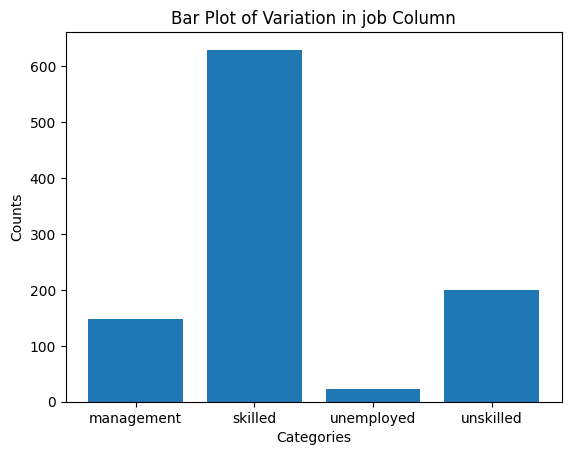

In [32]:
variation={i: j for i,j in zip(*np.unique(df['job'],return_counts=True))}
plt.bar(variation.keys(), variation.values())
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Bar Plot of Variation in job Column')
plt.show()

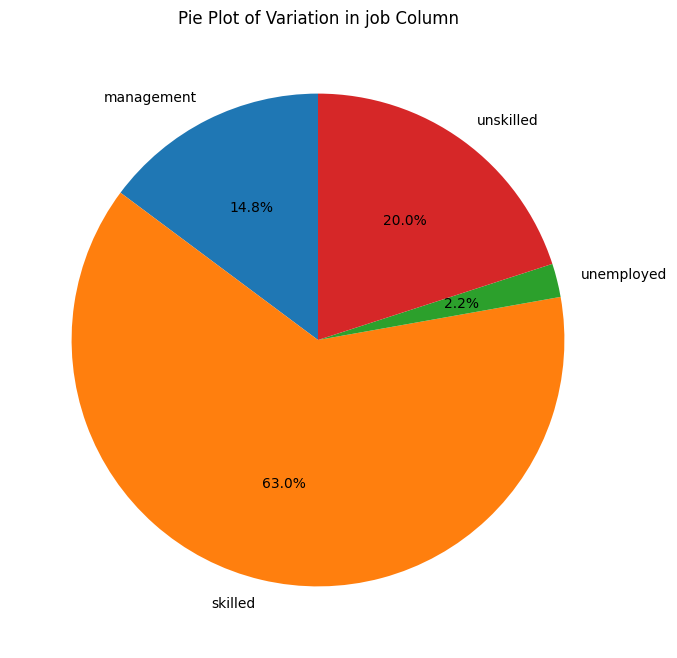

In [33]:
plt.figure(figsize=(10, 8))
plt.pie(variation.values(), labels=variation.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Pie Plot of Variation in job Column')
plt.show()

In [34]:
df['job']=le.fit_transform(df['job'])
df.head()

checking_balance  months_loan_duration  credit_history  purpose  amount  \
0                 0                     6               0        4    1169   
1                 2                    48               2        4    5951   
2                -1                    12               0        3    2096   
3                 0                    42               2        4    7882   
4                 0                    24               1        1    4870   

   savings_balance  employment_duration  percent_of_income  \
0                0                    4                  4   
1                1                    2                  2   
2                1                    3                  2   
3                1                    3                  2   
4                1                    2                  3   

   years_at_residence  age  other_credit  housing  existing_loans_count  job  \
0                   4   67             1        1                     2    1   
1                   2   22             1        1                     1    1   
2                   3   49             1        1                     1    3   
3                   4   45             1        0                     1    1   
4                   4   53             1        0                     2    1   

   dependents phone default  
0           1   yes      no  
1           1    no     yes  
2           2    no      no  
3           2    no      no  
4           2    no     yes

In [35]:
for i in variation.keys():
  print(f"{le.transform([i])[0]} => {i}")

0 => management
1 => skilled
2 => unemployed
3 => unskilled


phone column

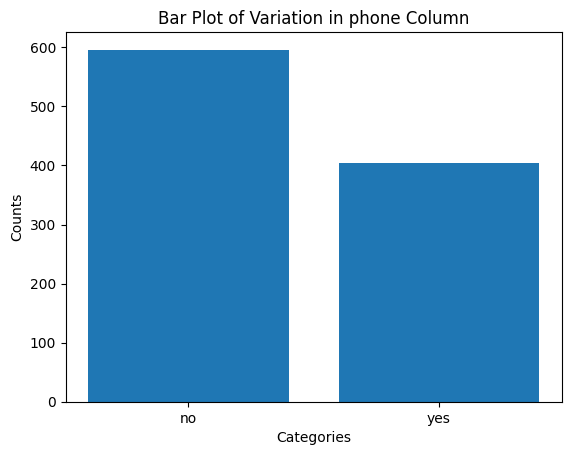

In [36]:
variation={i: j for i,j in zip(*np.unique(df['phone'],return_counts=True))}
plt.bar(variation.keys(), variation.values())
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Bar Plot of Variation in phone Column')
plt.show()

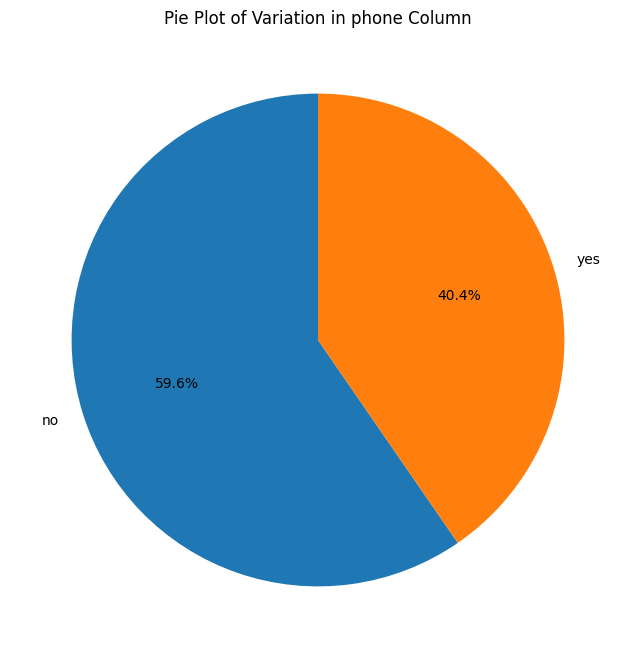

In [37]:
plt.figure(figsize=(10, 8))
plt.pie(variation.values(), labels=variation.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Pie Plot of Variation in phone Column')
plt.show()

In [38]:
df['phone']=le.fit_transform(df['phone'])
df.head()

checking_balance  months_loan_duration  credit_history  purpose  amount  \
0                 0                     6               0        4    1169   
1                 2                    48               2        4    5951   
2                -1                    12               0        3    2096   
3                 0                    42               2        4    7882   
4                 0                    24               1        1    4870   

   savings_balance  employment_duration  percent_of_income  \
0                0                    4                  4   
1                1                    2                  2   
2                1                    3                  2   
3                1                    3                  2   
4                1                    2                  3   

   years_at_residence  age  other_credit  housing  existing_loans_count  job  \
0                   4   67             1        1                     2    1   
1                   2   22             1        1                     1    1   
2                   3   49             1        1                     1    3   
3                   4   45             1        0                     1    1   
4                   4   53             1        0                     2    1   

   dependents  phone default  
0           1      1      no  
1           1      0     yes  
2           2      0      no  
3           2      0      no  
4           2      0     yes

In [39]:
for i in variation.keys():
  print(f"{le.transform([i])[0]} => {i}")

0 => no
1 => yes


default column

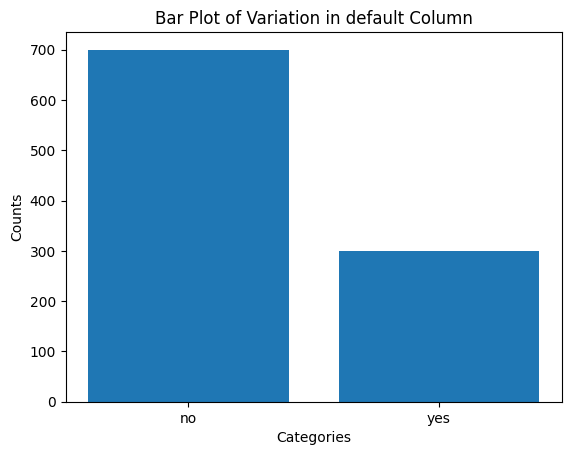

In [40]:
variation={i: j for i,j in zip(*np.unique(df['default'],return_counts=True))}
plt.bar(variation.keys(), variation.values())
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Bar Plot of Variation in default Column')
plt.show()

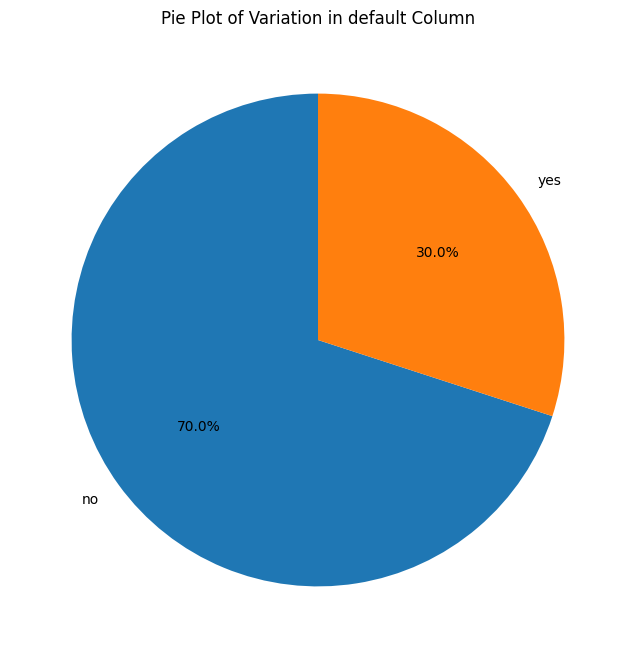

In [41]:
plt.figure(figsize=(10, 8))
plt.pie(variation.values(), labels=variation.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Pie Plot of Variation in default Column')
plt.show()

In [42]:
df['default']=le.fit_transform(df['default'])
df.head()

checking_balance  months_loan_duration  credit_history  purpose  amount  \
0                 0                     6               0        4    1169   
1                 2                    48               2        4    5951   
2                -1                    12               0        3    2096   
3                 0                    42               2        4    7882   
4                 0                    24               1        1    4870   

   savings_balance  employment_duration  percent_of_income  \
0                0                    4                  4   
1                1                    2                  2   
2                1                    3                  2   
3                1                    3                  2   
4                1                    2                  3   

   years_at_residence  age  other_credit  housing  existing_loans_count  job  \
0                   4   67             1        1                     2    1   
1                   2   22             1        1                     1    1   
2                   3   49             1        1                     1    3   
3                   4   45             1        0                     1    1   
4                   4   53             1        0                     2    1   

   dependents  phone  default  
0           1      1        0  
1           1      0        1  
2           2      0        0  
3           2      0        0  
4           2      0        1

In [43]:
for i in variation.keys():
  print(f"{le.transform([i])[0]} => {i}")

0 => no
1 => yes


### Analysis

In [44]:
df

checking_balance  months_loan_duration  credit_history  purpose  amount  \
0                   0                     6               0        4    1169   
1                   2                    48               2        4    5951   
2                  -1                    12               0        3    2096   
3                   0                    42               2        4    7882   
4                   0                    24               1        1    4870   
..                ...                   ...             ...      ...     ...   
995                -1                    12               2        4    1736   
996                 0                    30               2        1    3857   
997                -1                    12               2        4     804   
998                 0                    45               2        4    1845   
999                 2                    45               0        1    4576   

     savings_balance  employment_duration  percent_of_income  \
0                  0                    4                  4   
1                  1                    2                  2   
2                  1                    3                  2   
3                  1                    3                  2   
4                  1                    2                  3   
..               ...                  ...                ...   
995                1                    3                  3   
996                1                    2                  4   
997                1                    4                  4   
998                1                    2                  4   
999                2                    0                  3   

     years_at_residence  age  other_credit  housing  existing_loans_count  \
0                     4   67             1        1                     2   
1                     2   22             1        1                     1   
2                     3   49             1        1                     1   
3                     4   45             1        0                     1   
4                     4   53             1        0                     2   
..                  ...  ...           ...      ...                   ...   
995                   4   31             1        1                     1   
996                   4   40             1        1                     1   
997                   4   38             1        1                     1   
998                   4   23             1        0                     1   
999                   4   27             1        1                     1   

     job  dependents  phone  default  
0      1           1      1        0  
1      1           1      0        1  
2      3           2      0        0  
3      1           2      0        0  
4      1           2      0        1  
..   ...         ...    ...      ...  
995    3           1      0        0  
996    0           1      1        0  
997    1           1      0        0  
998    1           1      1        1  
999    1           1      0        0  

[1000 rows x 17 columns]

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   checking_balance      1000 non-null   int64
 1   months_loan_duration  1000 non-null   int64
 2   credit_history        1000 non-null   int64
 3   purpose               1000 non-null   int64
 4   amount                1000 non-null   int64
 5   savings_balance       1000 non-null   int64
 6   employment_duration   1000 non-null   int64
 7   percent_of_income     1000 non-null   int64
 8   years_at_residence    1000 non-null   int64
 9   age                   1000 non-null   int64
 10  other_credit          1000 non-null   int64
 11  housing               1000 non-null   int64
 12  existing_loans_count  1000 non-null   int64
 13  job                   1000 non-null   int64
 14  dependents            1000 non-null   int64
 15  phone                 1000 non-null   int64
 16  default

In [46]:
correlation_matrix=df.corr()
correlation_matrix

checking_balance  months_loan_duration  credit_history  \
checking_balance              1.000000              0.039355        0.145419   
months_loan_duration          0.039355              1.000000        0.077186   
credit_history                0.145419              0.077186        1.000000   
purpose                      -0.012474             -0.128694       -0.009599   
amount                        0.037551              0.624984        0.059905   
savings_balance               0.007255             -0.064526       -0.005209   
employment_duration          -0.106719              0.057381       -0.138225   
percent_of_income            -0.063802              0.074749       -0.044375   
years_at_residence           -0.070139              0.034067       -0.063198   
age                          -0.052208             -0.036136       -0.147086   
other_credit                 -0.036534              0.003559       -0.070460   
housing                      -0.015799             -0.157049        0.062095   
existing_loans_count         -0.088021             -0.011284       -0.437066   
job                           0.032567             -0.215438        0.009110   
dependents                   -0.050999             -0.023834       -0.011550   
phone                        -0.027212              0.164718       -0.052370   
default                       0.166827              0.214927        0.228785   

                       purpose    amount  savings_balance  \
checking_balance     -0.012474  0.037551         0.007255   
months_loan_duration -0.128694  0.624984        -0.064526   
credit_history       -0.009599  0.059905        -0.005209   
purpose               1.000000 -0.210375         0.002189   
amount               -0.210375  1.000000        -0.107538   
savings_balance       0.002189 -0.107538         1.000000   
employment_duration  -0.022342 -0.008367         0.014600   
percent_of_income     0.108289 -0.271316        -0.000805   
years_at_residence   -0.049809  0.028926        -0.011772   
age                  -0.097851  0.032716        -0.017997   
other_credit          0.060079 -0.020224         0.011002   
housing               0.055853 -0.135632         0.047764   
existing_loans_count -0.081676  0.020795        -0.004176   
job                   0.047388 -0.261139         0.032750   
dependents           -0.116408  0.017142        -0.021302   
phone                -0.135896  0.276995        -0.037452   
default              -0.055675  0.154739        -0.033871   

                      employment_duration  percent_of_income  \
checking_balance                -0.106719          -0.063802   
months_loan_duration             0.057381           0.074749   
credit_history                  -0.138225          -0.044375   
purpose                         -0.022342           0.108289   
amount                          -0.008367          -0.271316   
savings_balance                  0.014600          -0.000805   
employment_duration              1.000000           0.126161   
percent_of_income                0.126161           1.000000   
years_at_residence               0.245081           0.049302   
age                              0.256227           0.058266   
other_credit                    -0.077962           0.041423   
housing                         -0.111126          -0.089405   
existing_loans_count             0.125791           0.021669   
job                             -0.036076          -0.078090   
dependents                       0.097192          -0.071207   
phone                            0.060518           0.014413   
default                         -0.116002           0.072404   

                      years_at_residence       age  other_credit   housing  \
checking_balance               -0.070139 -0.052208     -0.036534 -0.015799   
months_loan_duration            0.034067 -0.036136      0.003559 -0.157049   
credit_history                 -0.063198 -0.147086     -0.070460  0.062095   
purpose          

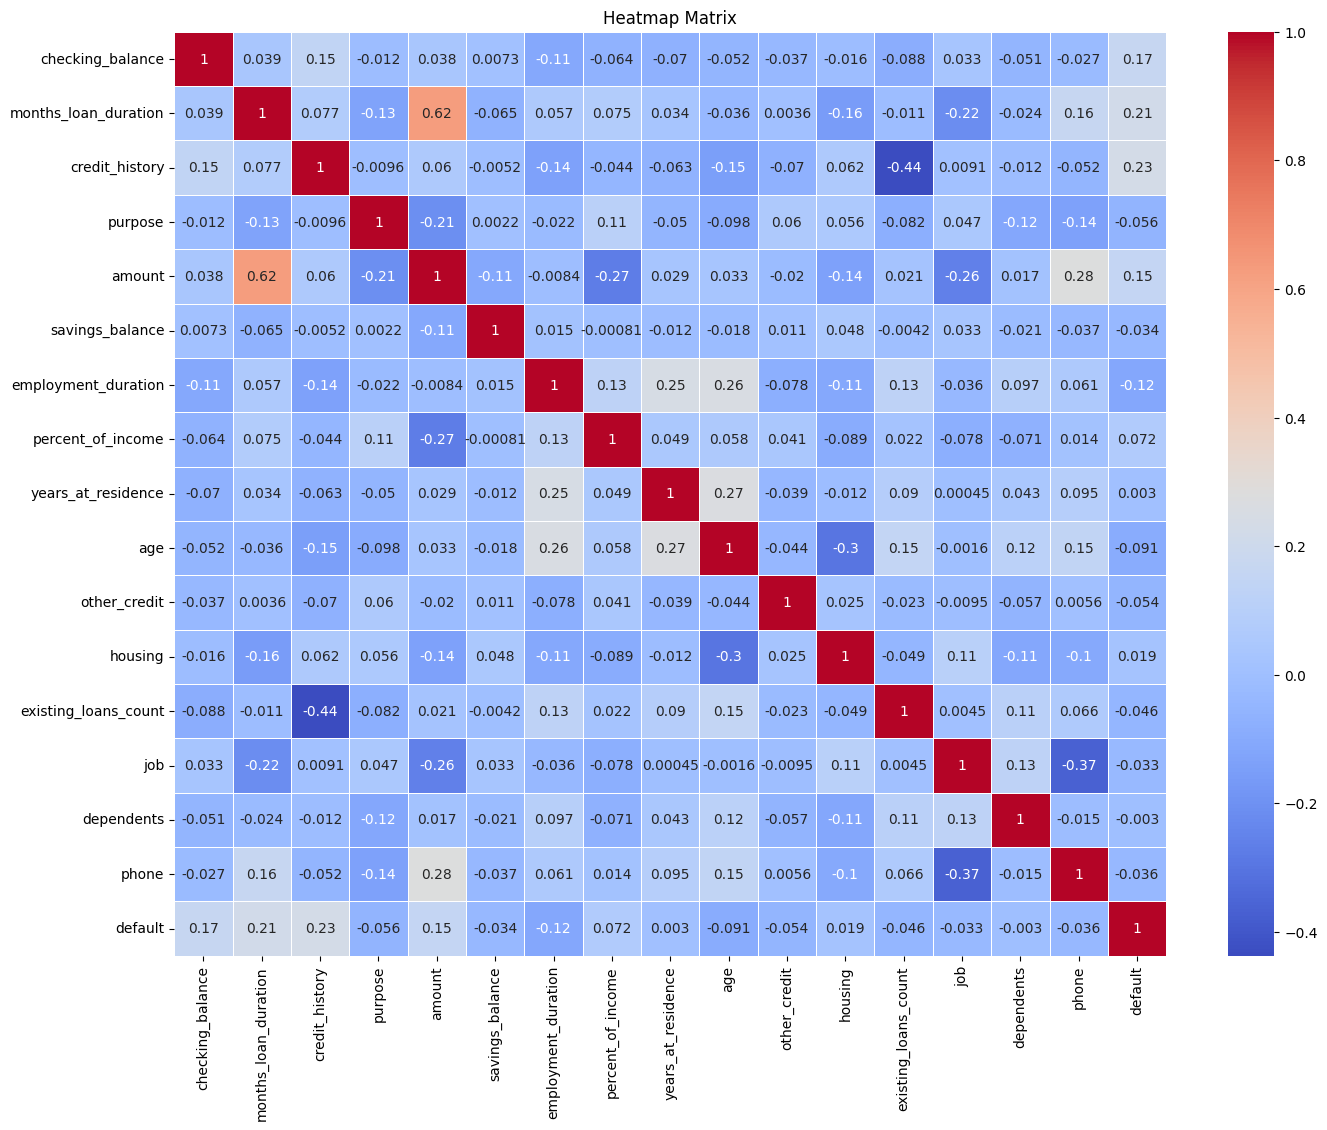

In [47]:
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Matrix')
plt.show()

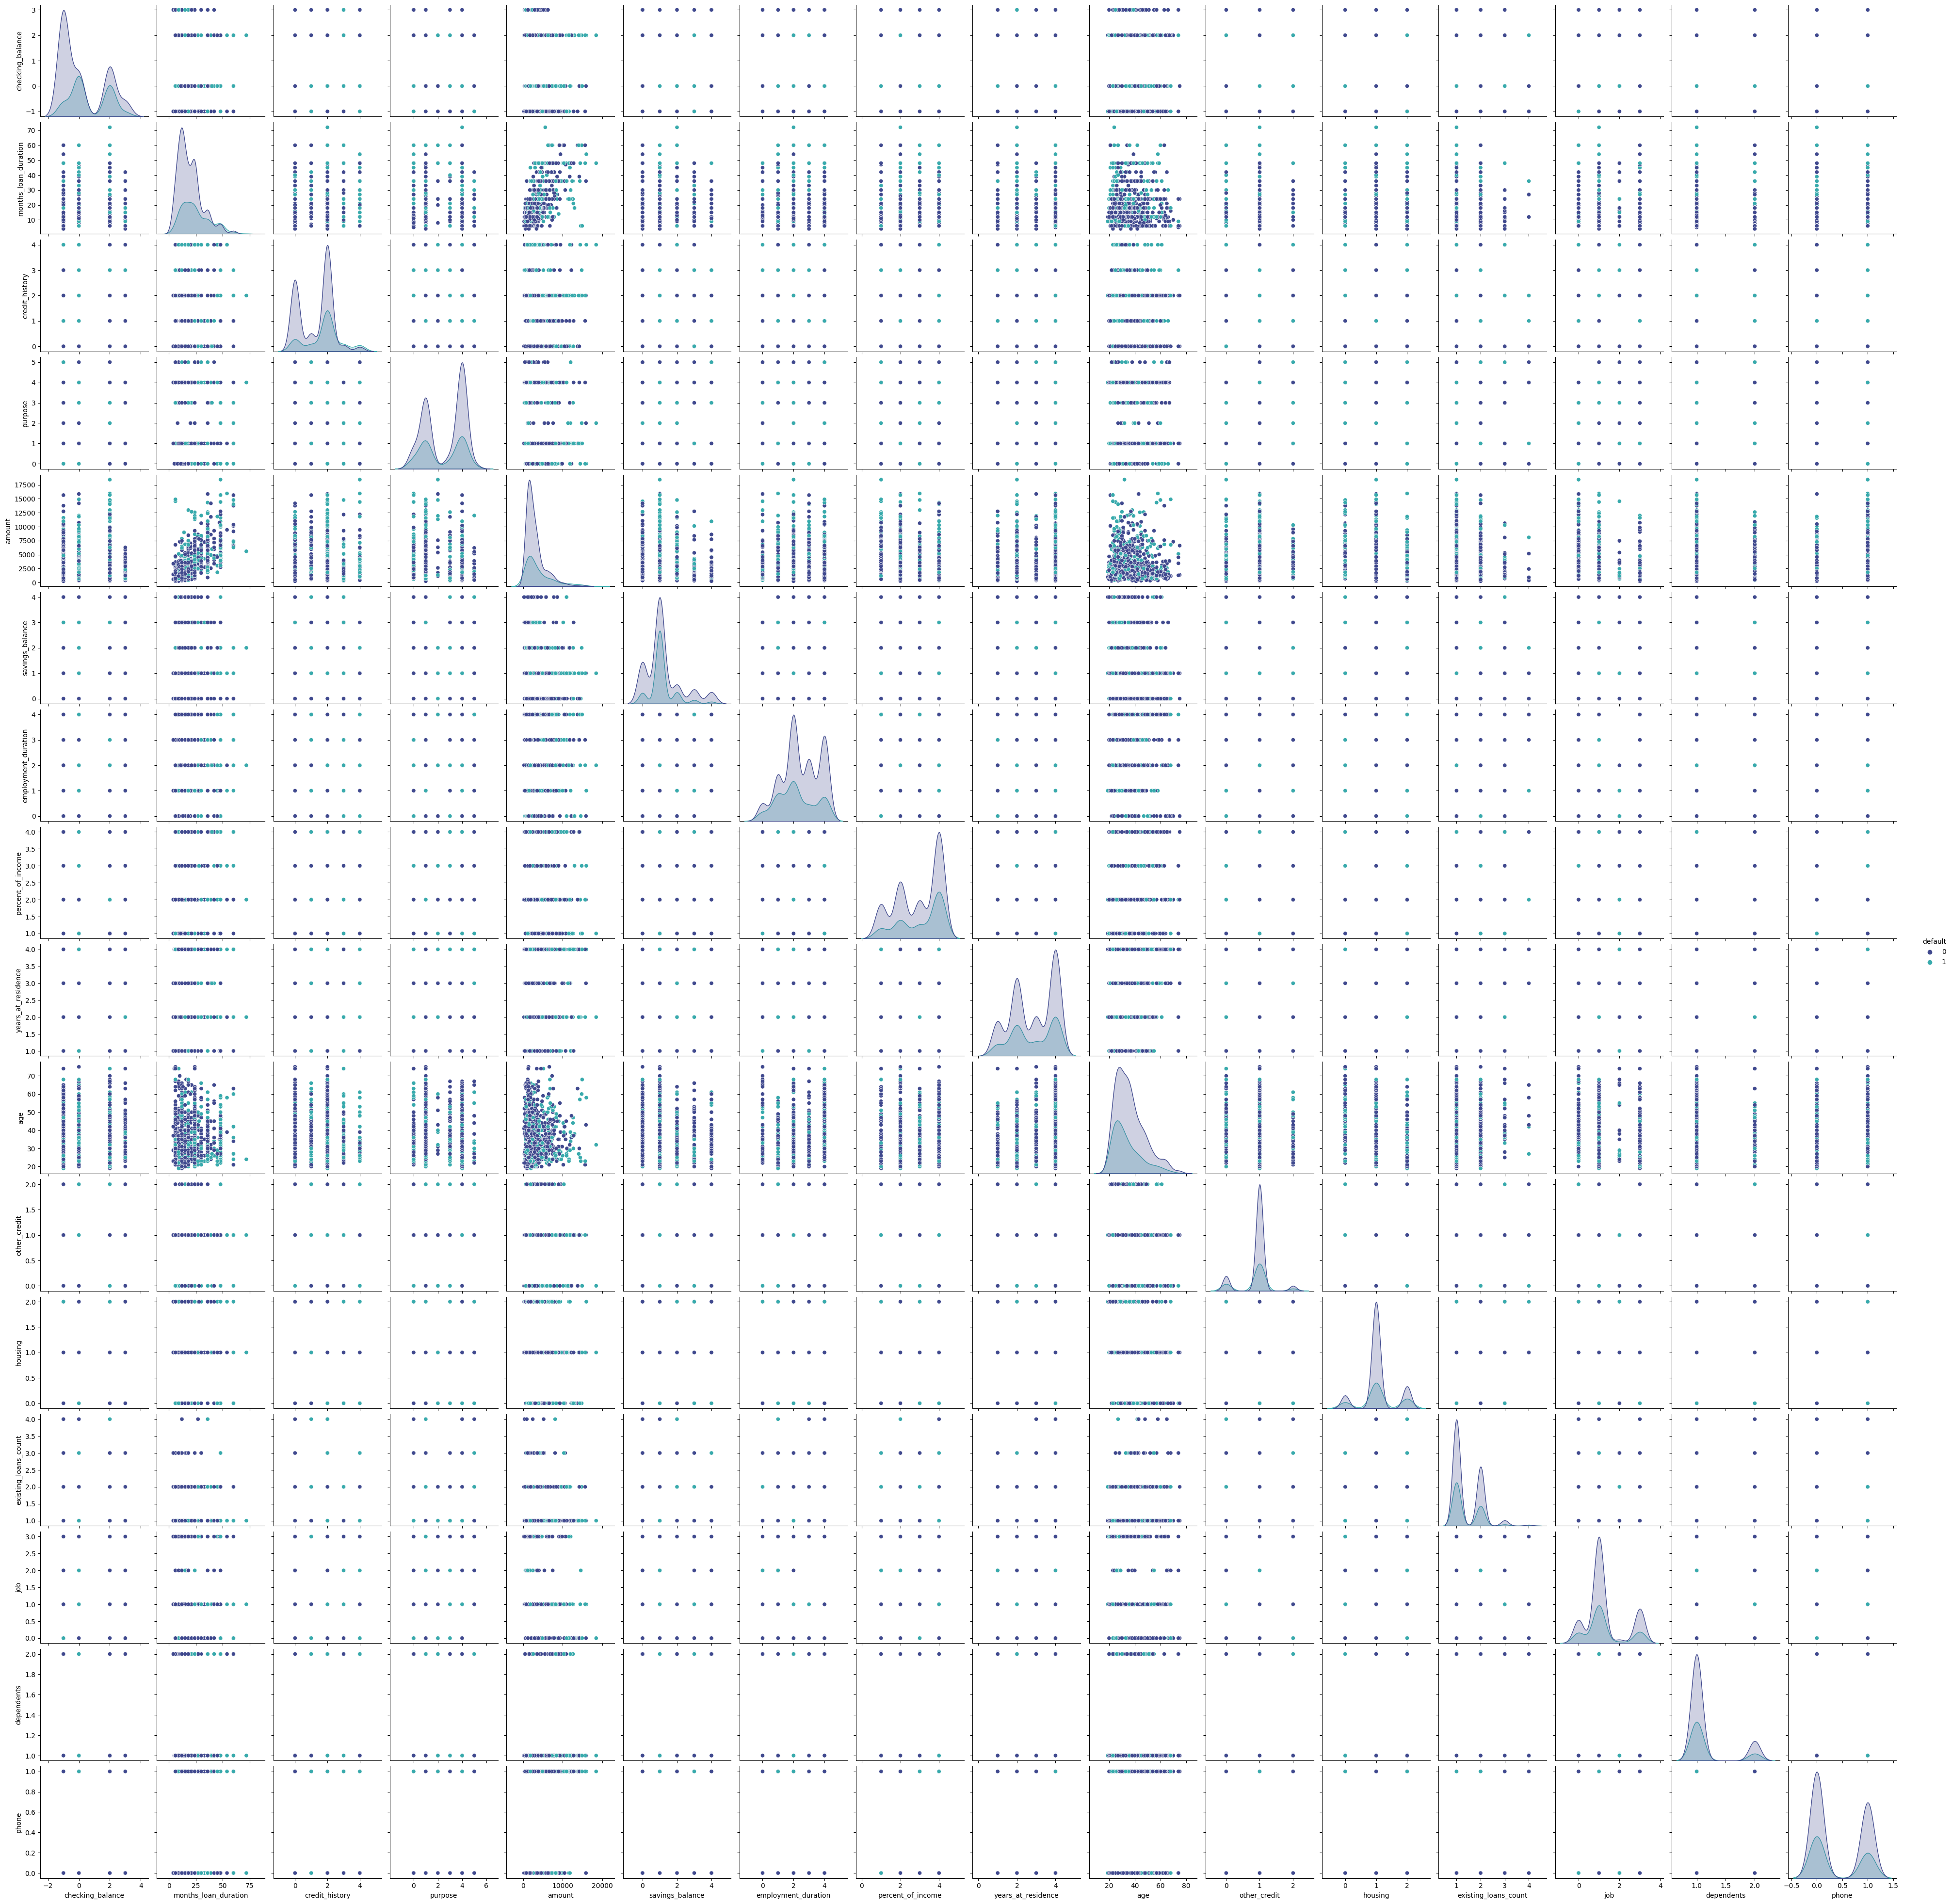

In [48]:
sns.pairplot(df,hue='default',palette="mako")
plt.show()

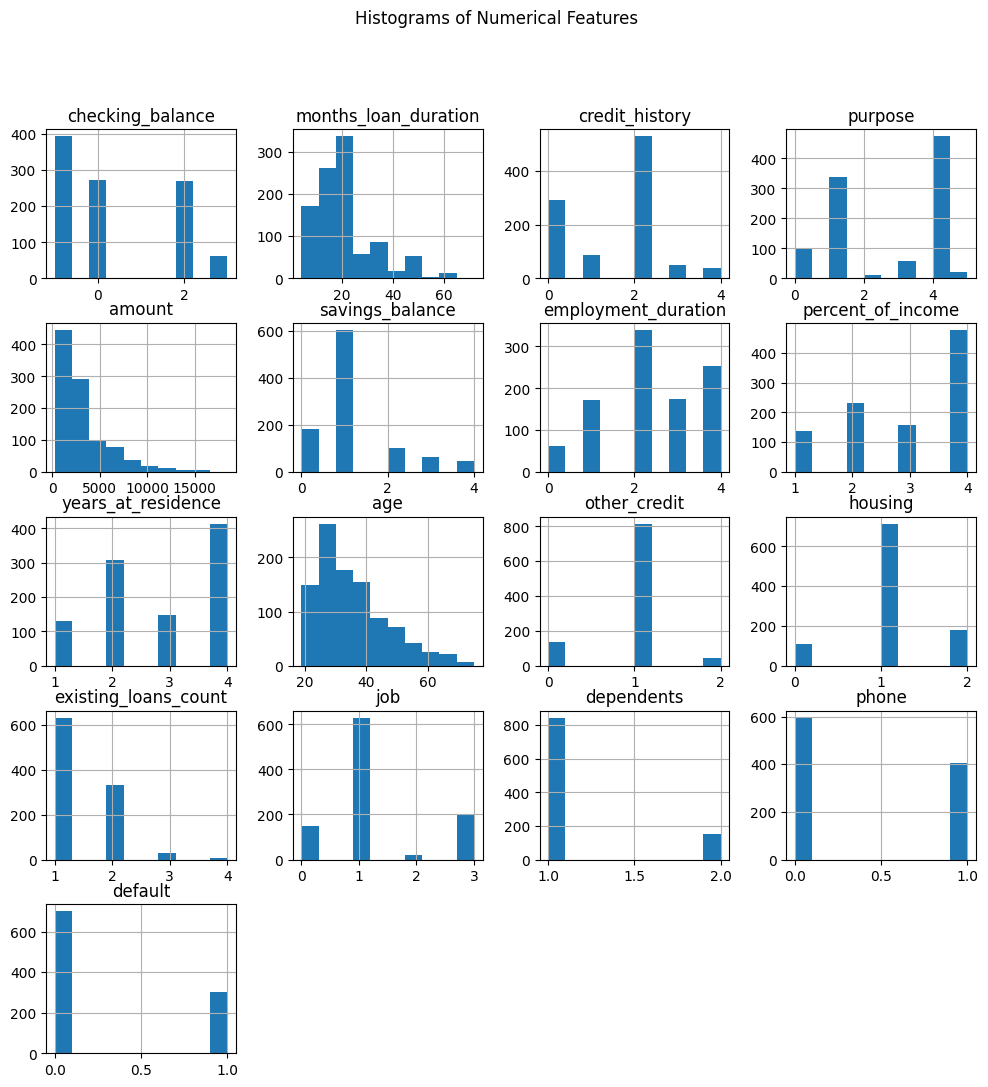

In [49]:
df[df.columns].hist(figsize=(12,12))
plt.suptitle('Histograms of Numerical Features')
plt.show()

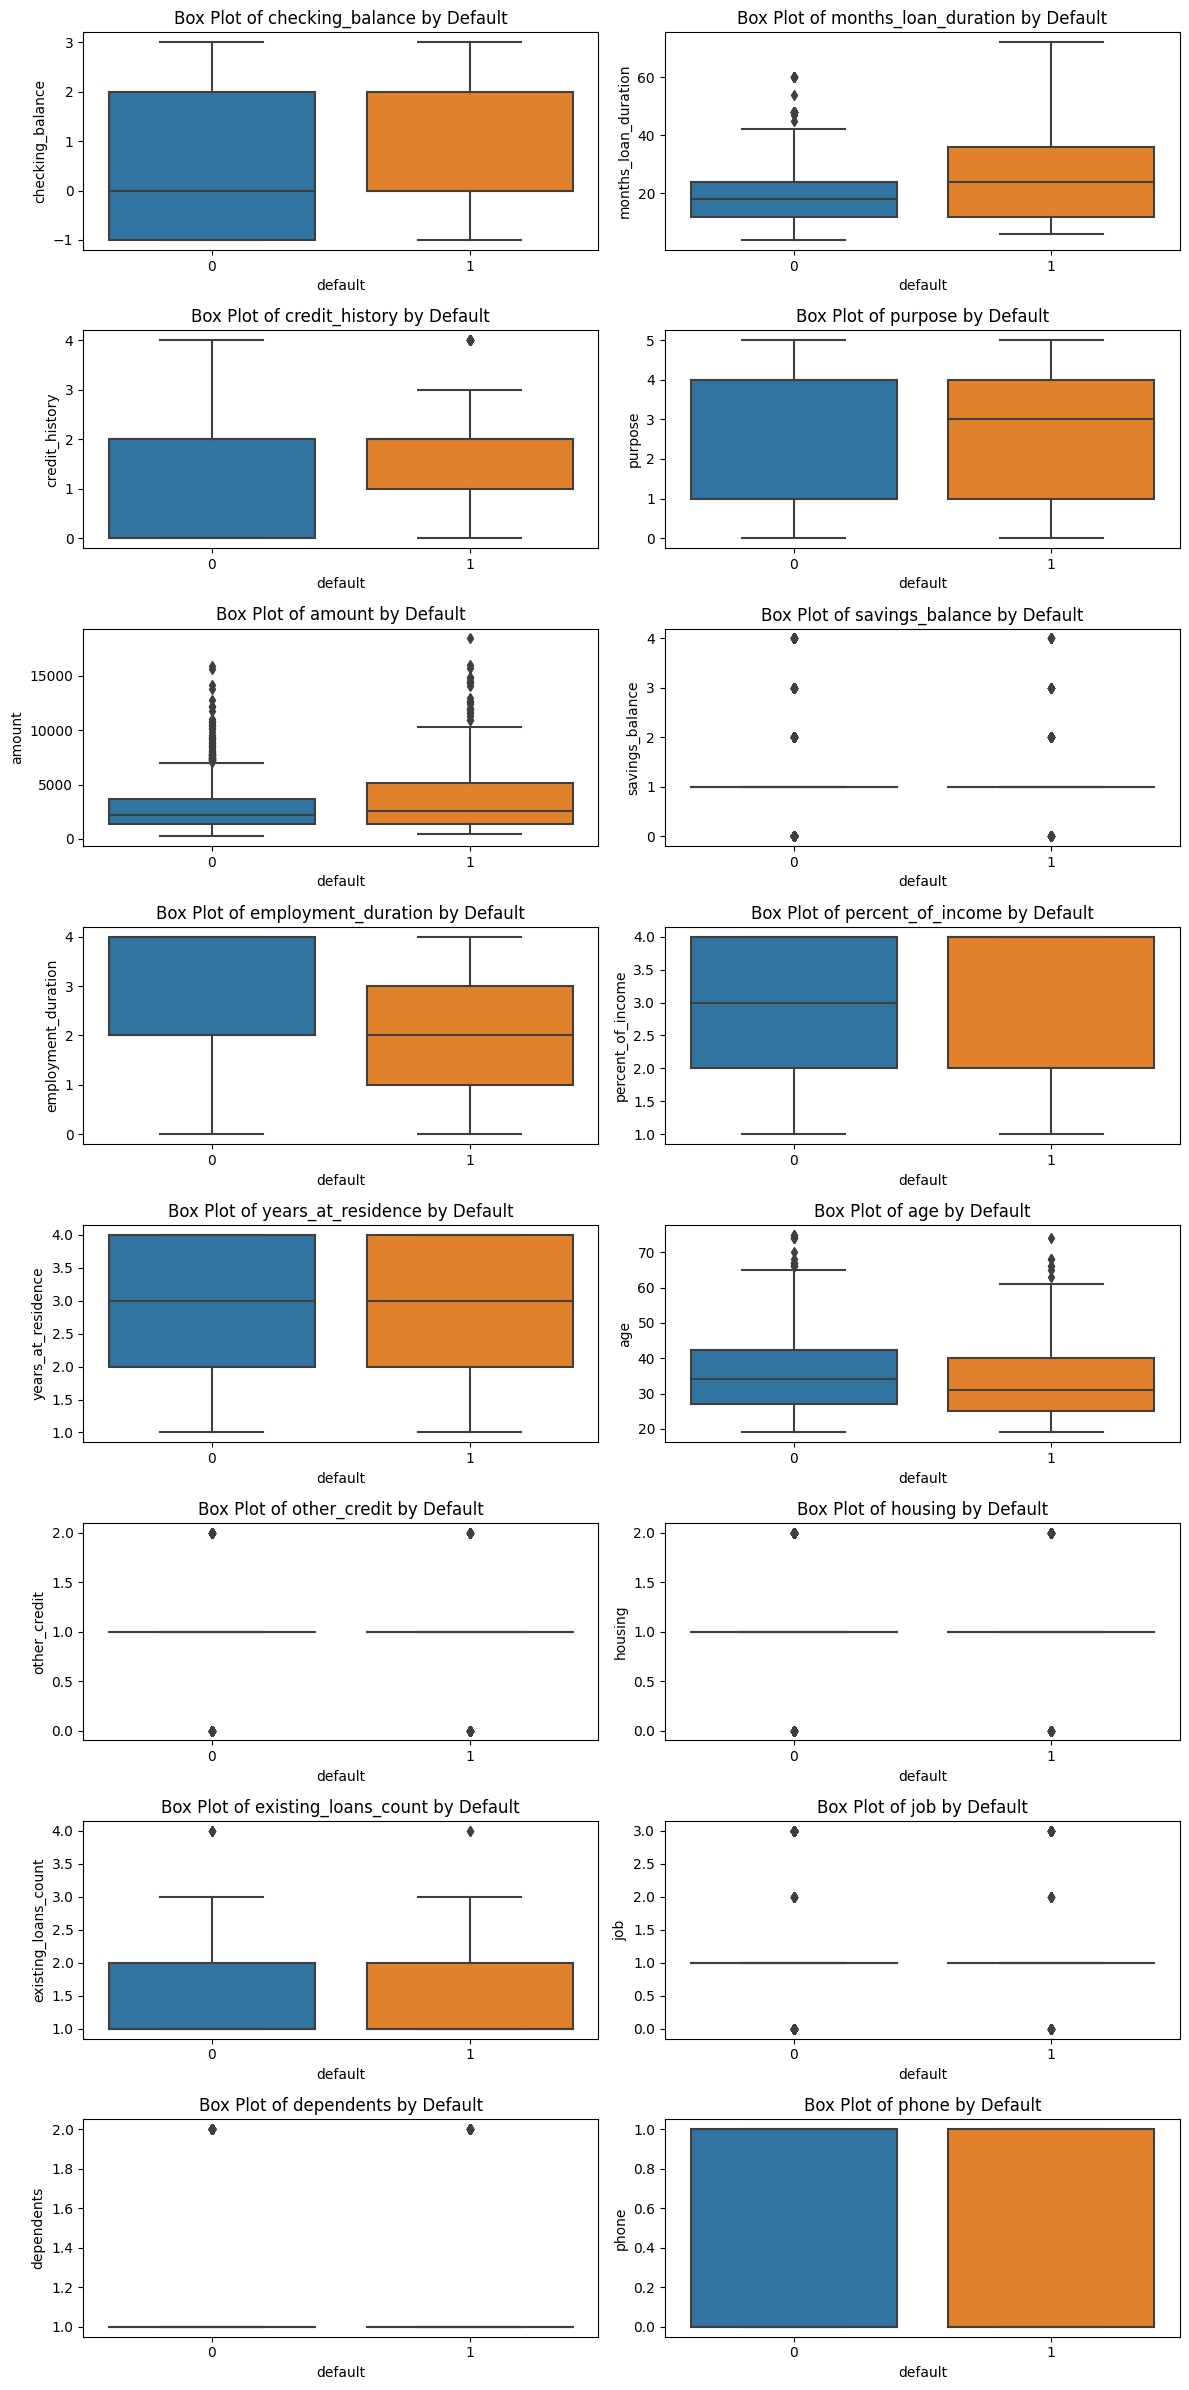

In [50]:
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(12,24))
for col, ax in zip(df.columns, axes.flatten()):
    sns.boxplot(x='default', y=col, data=df, ax=ax)
    ax.set_title(f'Box Plot of {col} by Default')
plt.tight_layout()
plt.show()

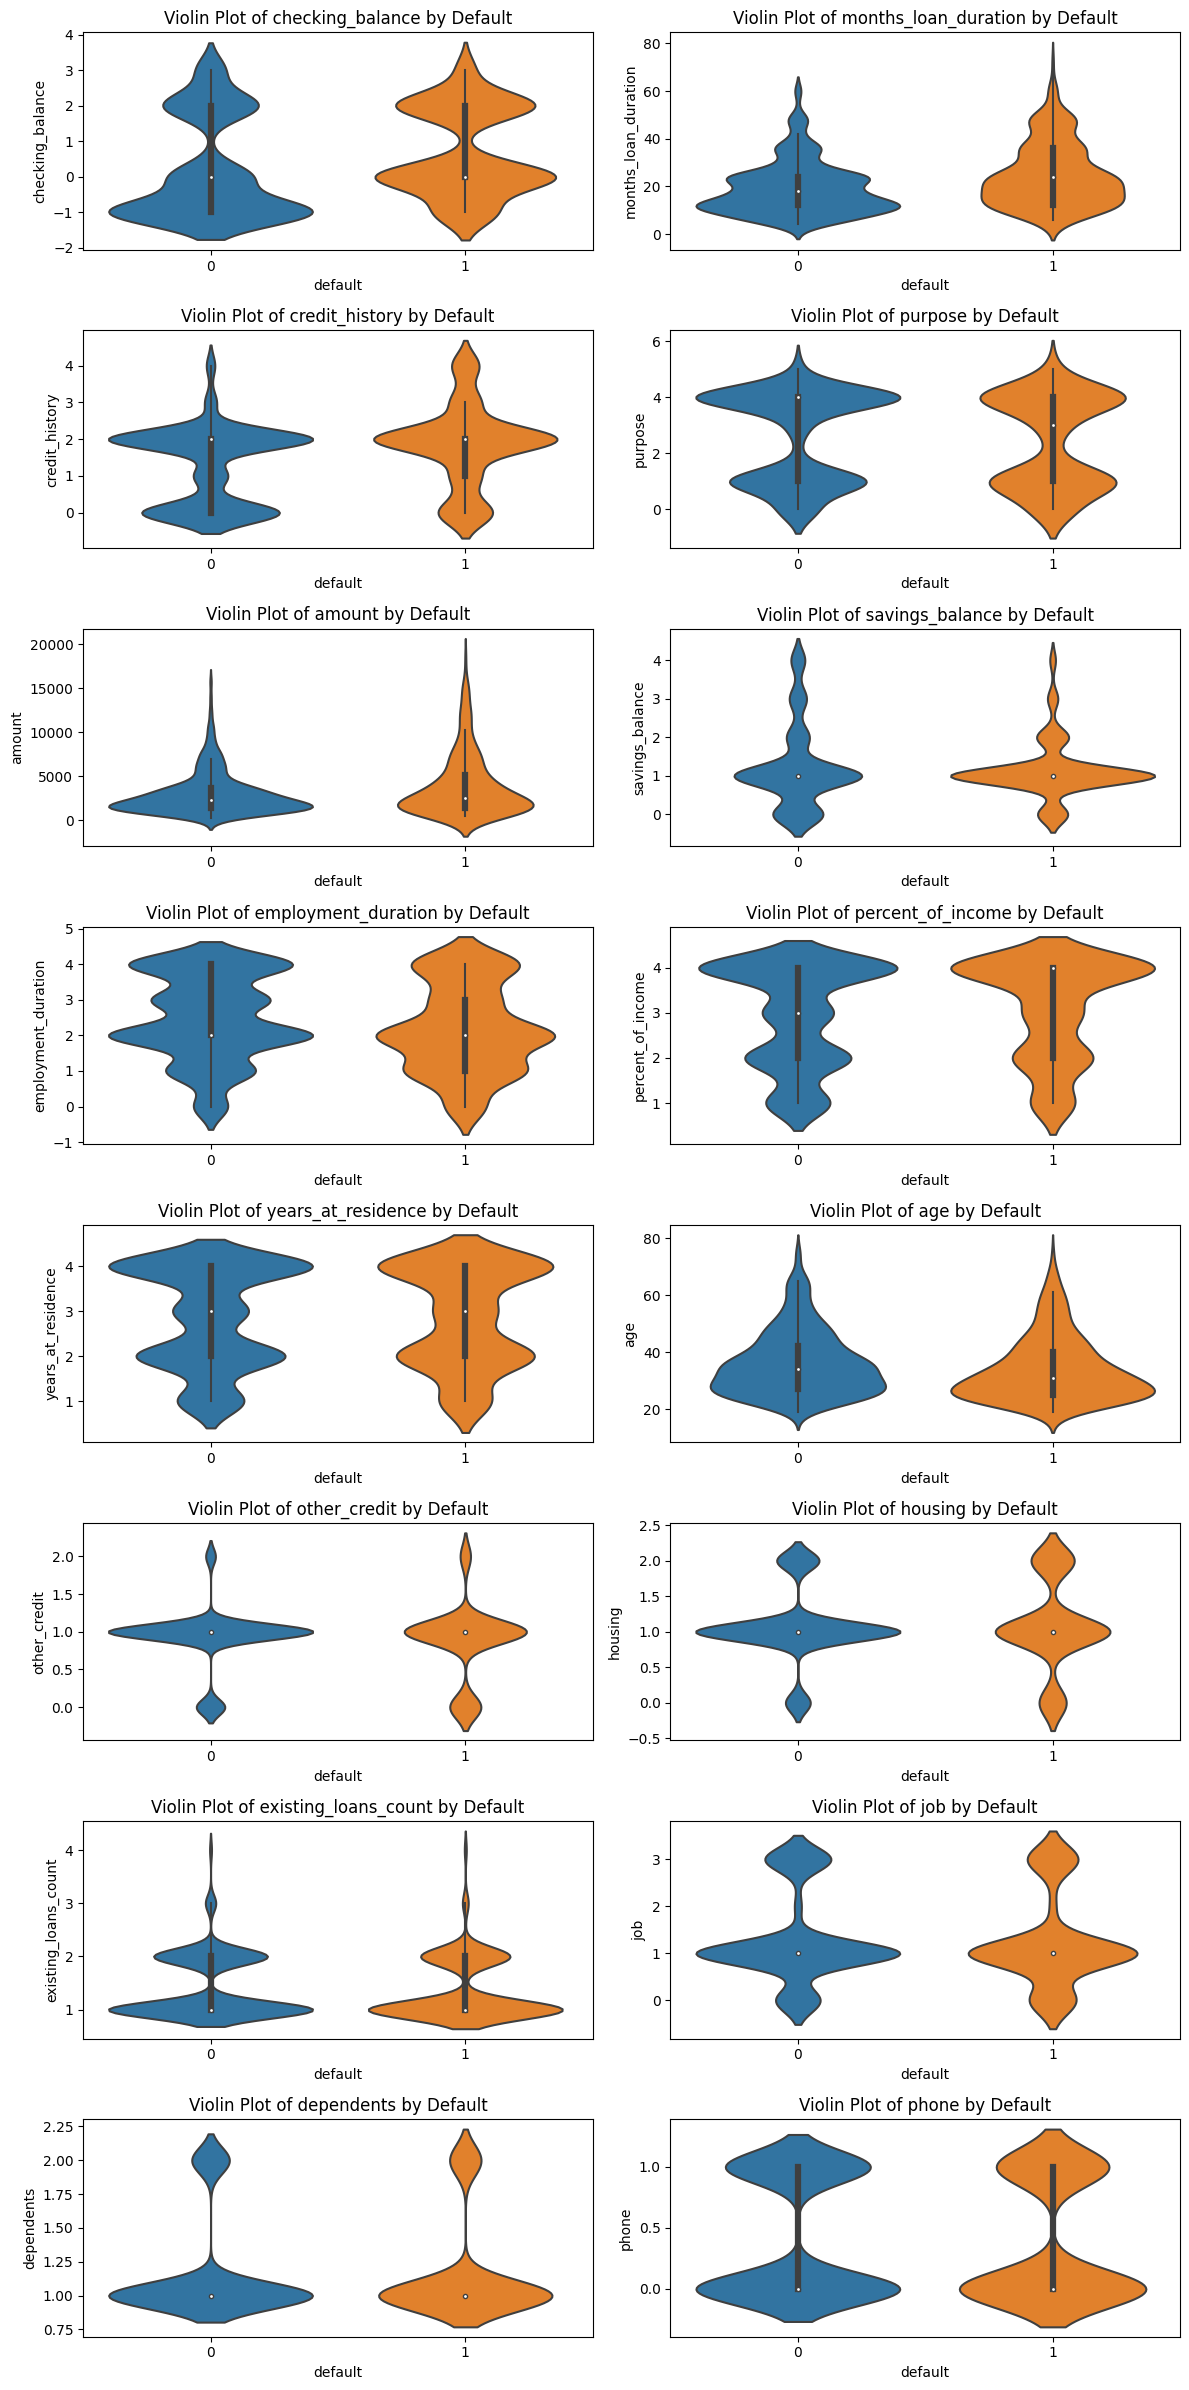

In [51]:
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(12,24))
for col, ax in zip(df.columns, axes.flatten()):
    sns.violinplot(x='default', y=col, data=df, ax=ax)
    ax.set_title(f'Violin Plot of {col} by Default')
plt.tight_layout()
plt.show()

### Data Spliting

In [52]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=69)

### Feature Scaling

In [54]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train[:,:-3]=sc.fit_transform(x_train[:,:-3])
x_test[:,:-3]=sc.transform(x_test[:,:-3])

## Step 2 - Models

In [55]:
from sklearn.metrics import confusion_matrix,accuracy_score
models_acc={}

### Model 1 - Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=69)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=69)

In [57]:
y_pred=classifier.predict(x_test)
acc=accuracy_score(y_test,y_pred)
models_acc['Logistic Regression']=acc
print(confusion_matrix(y_test,y_pred))
print(f"Accuracy: {acc*100}%")

[[139   7]
 [ 42  12]]
Accuracy: 75.5%


### Model 2 - K-Nearest Neighbors (KNN)

In [58]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [59]:
y_pred=classifier.predict(x_test)
acc=accuracy_score(y_test,y_pred)
models_acc['K-Nearest Neighbors']=acc
print(confusion_matrix(y_test,y_pred))
print(f"Accuracy: {acc*100}%")

[[122  24]
 [ 37  17]]
Accuracy: 69.5%


### Model 3 - Support Vector Machines (SVM)

In [60]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=69)
classifier.fit(x_train,y_train)

SVC(random_state=69)

In [61]:
y_pred=classifier.predict(x_test)
acc=accuracy_score(y_test,y_pred)
models_acc['Support Vector Machine']=acc
print(confusion_matrix(y_test,y_pred))
print(f"Accuracy: {acc*100}%")

[[140   6]
 [ 44  10]]
Accuracy: 75.0%


### Model 4 - Naive Bayes Classification

In [62]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [63]:
y_pred=classifier.predict(x_test)
acc=accuracy_score(y_test,y_pred)
models_acc['Naive Bayes']=acc
print(confusion_matrix(y_test,y_pred))
print(f"Accuracy: {acc*100}%")

[[127  19]
 [ 35  19]]
Accuracy: 73.0%


### Model 5 - Decision Trees Classification

In [64]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(random_state=69)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=69)

In [65]:
y_pred=classifier.predict(x_test)
acc=accuracy_score(y_test,y_pred)
models_acc['Decision Trees']=acc
print(confusion_matrix(y_test,y_pred))
print(f"Accuracy: {acc*100}%")

[[114  32]
 [ 37  17]]
Accuracy: 65.5%


### Model 6 - Random Forest Classification

In [66]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(random_state=69)
classifier.fit(x_train,y_train)

RandomForestClassifier(random_state=69)

In [67]:
y_pred=classifier.predict(x_test)
acc=accuracy_score(y_test,y_pred)
models_acc['Random Forest']=acc
print(confusion_matrix(y_test,y_pred))
print(f"Accuracy: {acc*100}%")

[[125  21]
 [ 40  14]]
Accuracy: 69.5%


### Model 7 - Artificial Neural Network (ANN)

In [68]:
import tensorflow as tf
tf.__version__

'2.14.0'

In [69]:
acc_ann={}
for i in range(1,7):
  for j in range(1,i+1):
    print(f'[INFO] Hidden Layers: {i}th nodes -> {j}th nodes.')
    ann=tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units=i,activation='relu'))
    ann.add(tf.keras.layers.Dense(units=j,activation='relu'))
    ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
    ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    ann.fit(x_train,y_train,epochs=10)
    y_pred=ann.predict(x_test)
    y_pred=(y_pred>0.5)
    acc=accuracy_score(y_test,y_pred)
    acc_ann[f'{i} {j}']=acc
    print(f'Score: {acc}')
    print('\n\n')

[INFO] Hidden Layers: 1th nodes -> 1th nodes.
Epoch 1/10
25/25 [==============================] - 2s 4ms/step - loss: 0.7016 - accuracy: 0.4963
Epoch 2/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5913
Epoch 3/10
25/25 [==============================] - 0s 4ms/step - loss: 0.6851 - accuracy: 0.6625
Epoch 4/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6802 - accuracy: 0.6825
Epoch 5/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6760 - accuracy: 0.6888
Epoch 6/10
25/25 [==============================] - 0s 4ms/step - loss: 0.6724 - accuracy: 0.6925
Epoch 7/10
25/25 [==============================] - 0s 4ms/step - loss: 0.6689 - accuracy: 0.6913
Epoch 8/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6656 - accuracy: 0.6925
Epoch 9/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6627 - accuracy: 0.6925
Epoch 10/10
7/7 [==============================] - 0s 3ms/step
Score: 0.

In [70]:
acc_ann

{'1 1': 0.73,
 '2 1': 0.69,
 '2 2': 0.73,
 '3 1': 0.73,
 '3 2': 0.755,
 '3 3': 0.73,
 '4 1': 0.73,
 '4 2': 0.73,
 '4 3': 0.75,
 '4 4': 0.73,
 '5 1': 0.73,
 '5 2': 0.73,
 '5 3': 0.715,
 '5 4': 0.75,
 '5 5': 0.73,
 '6 1': 0.73,
 '6 2': 0.735,
 '6 3': 0.765,
 '6 4': 0.735,
 '6 5': 0.735,
 '6 6': 0.765}

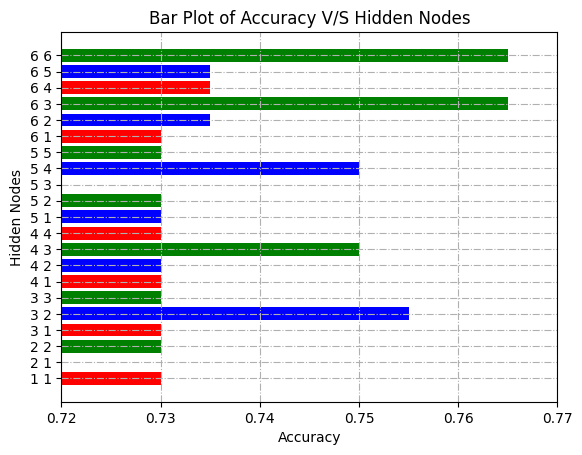

In [71]:
plt.barh(list(acc_ann.keys()),list(acc_ann.values()),color=['r','b','g'])
plt.xlabel('Accuracy')
plt.ylabel('Hidden Nodes')
plt.title('Bar Plot of Accuracy V/S Hidden Nodes')
plt.grid(True, linestyle='-.')
plt.xlim(0.72, 0.77)
plt.show()

In [72]:
max_key=max(acc_ann,key=lambda x:acc_ann[x])
models_acc[f"ANN(Hidden nodes:{max_key})"]=acc_ann[max_key]

## Step 3 - Analysing Best Model

In [73]:
models_acc

{'Logistic Regression': 0.755,
 'K-Nearest Neighbors': 0.695,
 'Support Vector Machine': 0.75,
 'Naive Bayes': 0.73,
 'Decision Trees': 0.655,
 'Random Forest': 0.695,
 'ANN(Hidden nodes:6 3)': 0.765}

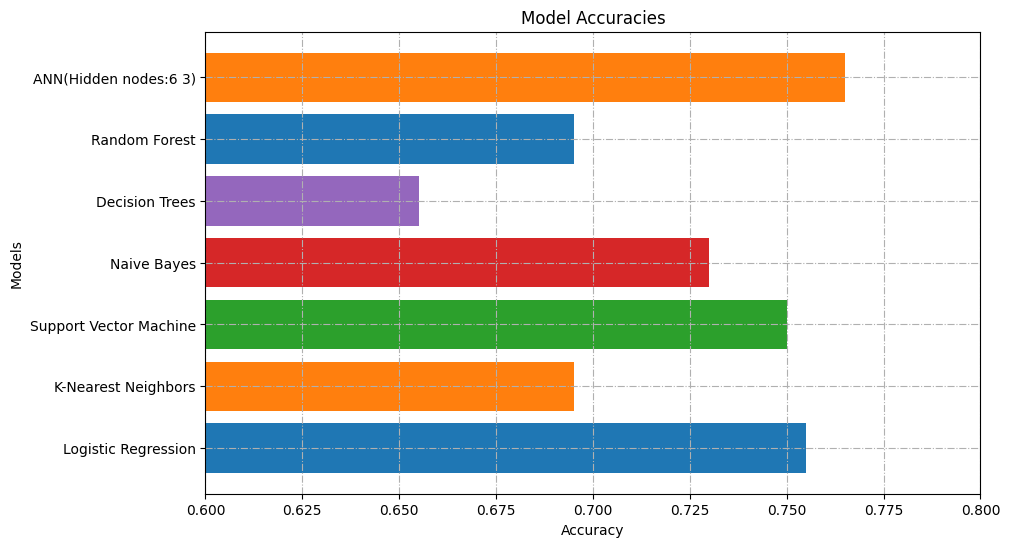

In [74]:
plt.figure(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
plt.barh(list(models_acc.keys()),list(models_acc.values()),color=colors)
plt.ylabel('Models')
plt.xlabel('Accuracy')
plt.title('Model Accuracies')
plt.grid(True, linestyle='-.')
plt.xlim(0.6,0.8)
plt.show()

Best Model Fit for Dataset:
1. ANN (with Hidden Nodes 5 and 4)
2. Logistic Regression
3. SVM (rbf)
4. Naive Bayes
5. KNN & Random Forest [Same Accuracy]
6. Decision Trees

Best Regrads,<br>
Lakshya Sharma